In [1]:
# machine learning pipeline (supervised)
# 1. read the data
# 2. preprocess the data [dynamic]
# 3. split X and Y
# 4, Train Test Split
# 5. Apply algorithm
# 6. Test Model
# 7. Finetune
# 8. Create Application
# 9. Deploy

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

In [3]:
data = pd.read_csv("Advertising.csv",index_col=0)

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.shape

(200, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'TV VS Sales')

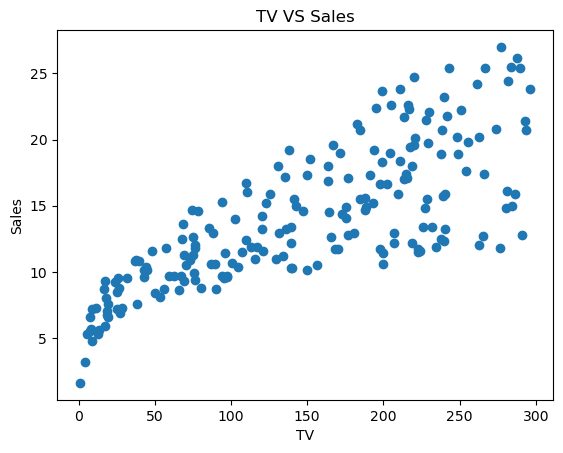

In [9]:
plt.scatter(data["TV"],data["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV VS Sales")

{'whiskers': [<matplotlib.lines.Line2D at 0x1e933afc5f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e933afca10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e933afc3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e933afd010>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e933afd340>],
 'means': []}

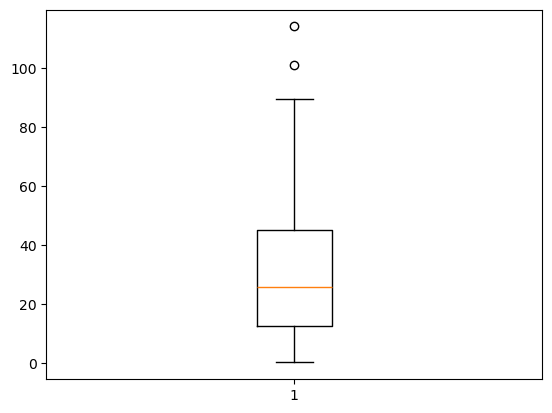

In [10]:
plt.boxplot(data["Newspaper"])

In [11]:
data_new = data[data["Newspaper"] < 90]

In [12]:
print(data_new.shape)

(198, 4)


In [13]:
x = data_new[["TV","Radio","Newspaper"]]
y = data_new["Sales"]

In [14]:
print(x.shape)
print(y.shape)

(198, 3)
(198,)


<Axes: >

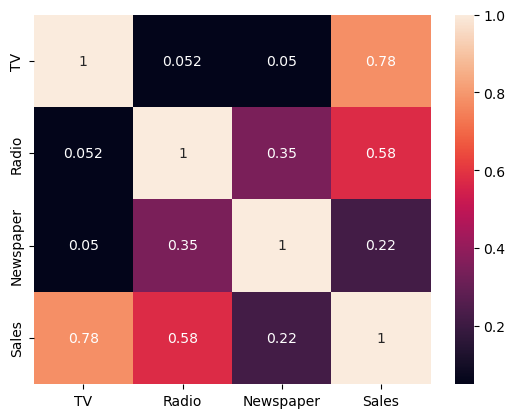

In [15]:
sns.heatmap(data_new.corr(),annot=True)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(158, 3)
(158,)
(40, 3)
(40,)


In [18]:
# Types of algorithm 
# Liner Regression 
# logistic Regression 
# KNN
# Decision Tree
# Ensemble Modeling 


In [19]:
# y= b0 + b1x1 + b2x2 + b3x3....+bnxn

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(x_train,y_train)

In [21]:
print("Beta 1,2,3:",model.coef_)

Beta 1,2,3: [ 0.04611231  0.19082399 -0.00354528]


In [22]:
print("Beta Zero :",model.intercept_)

Beta Zero : 2.927012425975704


In [23]:
data_new.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [24]:
y = 2.7583763604400353 + (0.04592567*230.1) +(0.19304235 *37.8) + (-0.00279254*69.2)

In [25]:
print(y)

20.429630089440035


In [26]:
y_pred = model.predict(x_test)

In [27]:
new_df = pd.DataFrame()
new_df = x_test
new_df['Actual Sales '] = y_test
new_df['Predicted Sales ']=y_pred
new_df

,TV,Radio,Newspaper,Actual Sales,Predicted Sales
18,281.4,39.6,55.8,24.4,23.261819
126,87.2,11.8,25.9,10.6,9.107906
197,94.2,4.9,8.1,9.7,8.177113
82,239.8,4.1,36.9,12.3,14.636302
137,25.6,39.0,9.3,9.5,11.516652
23,13.2,15.9,49.6,5.6,6.393950
185,253.8,21.3,30.0,17.6,18.588509
181,156.6,2.6,8.3,10.5,10.614917
192,75.5,10.8,6.0,9.9,8.448119
52,100.4,9.6,3.6,10.7,9.375835


In [28]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(y_test,y_pred)
print("R-Squared:" ,r2)

rmse =np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-Squared: 0.9192560372488661
RMSE: 1.3962523375255935
